In [12]:
import pandas as pd
from scipy.stats import wilcoxon, spearmanr
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv("https://gist.githubusercontent.com/kartikjoshi267/afdbd38f1842037f4845237cba184e5d/raw/819a506fcb683f89d8584c3b170f45e04e5056a4/student_dropout_analysis.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [14]:
sample_data = data.sample(500, random_state=42)

# Assuming you have the sample data in a pandas DataFrame called 'sample_data'

# Step 1: Calculate sample statistic
sample_statistic = sample_data['GDP'].mean()  # Example: Mean

# Step 2: Choose a confidence level
confidence_level = 0.95  # For a 95% confidence level

# Step 3: Calculate the standard error (assuming you're estimating the population mean)
sample_size = len(sample_data)
standard_deviation = np.std(data['GDP'], ddof=1)  # ddof=1 for sample standard deviation
standard_error = standard_deviation / np.sqrt(sample_size)

# Step 4: Compute the margin of error
margin_of_error = ((1 - confidence_level) / 2) * standard_error

# Step 5: Construct the confidence interval
lower_bound = sample_statistic - margin_of_error
upper_bound = sample_statistic + margin_of_error

print("Sample Statistic:", sample_statistic)
print("Confidence Interval:", (lower_bound, upper_bound))
print("Margin of error:", margin_of_error)

Sample Statistic: -0.14827999999999997
Confidence Interval: (-0.15081786497558966, -0.14574213502441027)
Margin of error: 0.0025378649755897044


4424


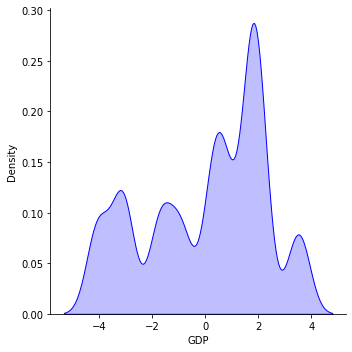

500


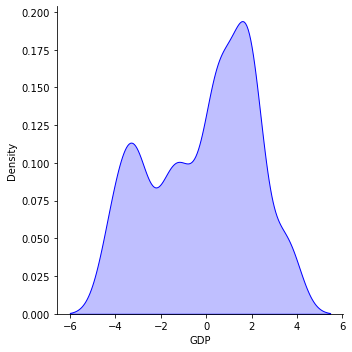

In [15]:
print(len(data))
sns.displot(data['GDP'], kind='kde', color='blue', fill=True)
plt.show()
print(len(sample_data))
sns.displot(sample_data['GDP'], kind='kde', color='blue', fill=True)
plt.show()

### Define Null and Alternative Hypothesis

Null Hypothesis (H0): The gdp is related to the dropout rates (=)

Alternative Hypothesis (H1): The gdp is not related to the dropout rates (not equal to =/=)

In [16]:
# Choose a Significance Level (alpha)
alpha = 0.05

# Perform Chi-squared Test
encoder = LabelEncoder()
chi2, p_value = wilcoxon(sample_data['GDP'], encoder.fit_transform(sample_data["Target"]))
print(chi2, p_value)

# Interpret Results
if p_value <= alpha:
    print("Reject Null Hypothesis: There is evidence that the dropout rate is related to the GDP.")
else:
    print("Fail to reject Null Hypothesis: There is no evidence that the dropout rate is related to the GDP.")

29958.0 5.030944128151406e-24
Reject Null Hypothesis: There is evidence that the dropout rate is related to the GDP.


NULL HYPOTHESIS 1: there is no significant correlation between the dropout rate GDP.

ALTERNATE HYPOTHESIS 1: there is a significant correlation between the dropout rate GDP.

In [17]:
# Calculate Spearman's rank correlation
encoder = LabelEncoder()
correlation, p_value = spearmanr(sample_data['GDP'], encoder.fit_transform(sample_data["Target"]))

print("Spearman's Rank Correlation Coefficient:", correlation)
print("p-value:", p_value)

alpha = 0.05
if p_value <= alpha:
    print("Reject Null Hypothesis: There is evidence that there is a significant correlation between the dropout rate and the GDP of nation")
else:
    print("Fail to reject Null Hypothesis: There is no evidence that there is a significant correlation between the dropout rate and the GDP of nation")


Spearman's Rank Correlation Coefficient: 0.09601178297305796
p-value: 0.03183500412545808
Reject Null Hypothesis: There is evidence that there is a significant correlation between the dropout rate and the GDP of nation
